In [1]:
pip install mysql.connector.python


   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.3 MB 131.3 kB/s eta 0:01:50
   ---------------------------------------- 0.0/14.3 MB 131.3 kB/s eta 0:01:50
   ---------------------------------------- 0.0/14.3 MB 131.3 kB/s eta 0:01:50
   ---------------------------------------- 0.0/14.3 MB 131.3 kB/s eta 0:01:50
   ---------------------------------------- 0.1/14.3 MB 182.2 kB/s eta 0:01:19
   ---------------------------------------- 0.1/14.3 MB 187.3 kB/s eta 0:01:17
   ---------------------------------------- 0.1/14.3 MB 245.8 kB/s eta 0:00:58
   ---------------------------------------- 0.1/14.3 MB 315.4 kB/s eta 0:00:46
   ---------------------------------------- 0.2/14.3 MB 350.1 kB/s eta 0:00:41
    --------------------------------------- 0.2/14.3 MB 389.1 kB/s eta 0:00:37


In [118]:
import mysql.connector
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
connection = mysql.connector.connect(host = 'localhost',
user = 'root', password = 'Farayiola8865!', db = 'tech', use_pure = True)

mycursor = connection.cursor()
print(connection)

In [7]:
connection

In [9]:
tech_tables = pd.read_sql_query('SHOW TABLES', connection)

In [11]:
tech_tables

,Tables_in_tech
0,feedback_data
1,product_data
2,sales_data


In [19]:
feedback = pd.read_sql_query('SELECT* FROM feedback_data', connection)

In [23]:
feedback.head()

,Feedback ID,Product ID,Return Date,Return Reason,Customer Feedback
0,1,124,2023-06-04,Changed my mind,The product I received didn't match the descri...
1,2,160,2022-12-22,Not as described,The product I received didn't match the descri...
2,3,187,2023-03-10,Defective product,The product I received was defective. It didn'...
3,4,37,2023-02-10,Changed my mind,I received the wrong item. It's not what I ord...
4,5,178,2022-12-15,Not as described,The quality of the product is disappointing. I...


In [25]:
feedback_describe = pd.read_sql_query('DESC feedback_data', connection)

In [27]:
feedback_describe


,Field,Type,Null,Key,Default,Extra
0,Feedback ID,int,YES,,None,
1,Product ID,int,YES,,None,
2,Return Date,date,YES,,None,
3,Return Reason,text,YES,,None,
4,Customer Feedback,text,YES,,None,


In [29]:
product = pd.read_sql_query('SELECT* FROM product_data', connection)

In [31]:
product.head()

,Product ID,Product Category,Product Attributes
0,1,Accessories,Resolution (pixels)
1,2,Accessories,Compatibility
2,3,Accessories,Material
3,4,Smartphones,Camera Quality (MP)
4,5,Smartphones,Battery Life (hours)


In [33]:
product_describe = pd.read_sql_query('DESC product_data', connection)


In [35]:
product_describe

,Field,Type,Null,Key,Default,Extra
0,Product ID,int,YES,,None,
1,Product Category,text,YES,,None,
2,Product Attributes,text,YES,,None,


In [37]:
sales = pd.read_sql_query('SELECT* FROM sales_data', connection)

In [39]:
sales.head()

,Sale ID,Product ID,sales Date,Sales Volume,Revenue Generated
0,1,25,2023-08-10,6,448.40
1,2,169,2023-04-21,41,355.71
2,3,111,2022-10-02,40,445.44
3,4,91,2022-10-29,66,734.27
4,5,109,2023-03-17,51,307.70


In [41]:
sales_describe = pd.read_sql_query('DESC sales_data', connection)

In [45]:
sales_describe

,Field,Type,Null,Key,Default,Extra
0,Sale ID,int,YES,,None,
1,Product ID,int,YES,,None,
2,sales Date,date,YES,,None,
3,Sales Volume,int,YES,,None,
4,Revenue Generated,double,YES,,None,


DESCRIPTIVE ANALYSIS

In [58]:
feedback_data_desc = feedback.describe (include ='all')
product_data_desc = product.describe (include ='all')
sales_data_desc = sales.describe (include ='all')

In [56]:
feedback_data_desc

,Feedback ID,Product ID,Return Date,Return Reason,Customer Feedback
count,1500.000000,1500.000000,1500,1500,1500
unique,NaN,NaN,357,5,10
top,NaN,NaN,2022-11-15,Wrong item received,I received the wrong item. It's not what I ord...
freq,NaN,NaN,12,335,175
mean,750.500000,102.080667,NaN,NaN,NaN
std,433.157015,58.738389,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,375.750000,48.000000,NaN,NaN,NaN
50%,750.500000,104.000000,NaN,NaN,NaN
75%,1125.250000,155.000000,NaN,NaN,NaN


In [60]:
product_data_desc

,Product ID,Product Category,Product Attributes
count,200.000000,200,200
unique,NaN,3,17
top,NaN,Accessories,Color Options
freq,NaN,74,36
mean,100.500000,NaN,NaN
std,57.879185,NaN,NaN
min,1.000000,NaN,NaN
25%,50.750000,NaN,NaN
50%,100.500000,NaN,NaN
75%,150.250000,NaN,NaN


In [62]:
sales_data_desc

,Sale ID,Product ID,sales Date,Sales Volume,Revenue Generated
count,2000.000000,2000.000000,2000,2000.000000,2000.000000
unique,NaN,NaN,363,NaN,NaN
top,NaN,NaN,2023-02-20,NaN,NaN
freq,NaN,NaN,12,NaN,NaN
mean,1000.500000,102.109500,NaN,51.725000,519.684015
std,577.494589,57.415519,NaN,28.627629,273.633332
min,1.000000,1.000000,NaN,1.000000,50.090000
25%,500.750000,54.000000,NaN,27.000000,283.342500
50%,1000.500000,104.000000,NaN,52.000000,518.560000
75%,1500.250000,153.000000,NaN,76.000000,753.097500


EXPLORATORY DATA ANALYSIS

In [87]:
sales_product_data = pd.merge(sales, product, on = 'Product ID')
full_data = pd.merge(feedback,sales_product_data, on = 'Product ID')

In [98]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15121 entries, 0 to 15120
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Feedback ID         15121 non-null  int64         
 1   Product ID          15121 non-null  int64         
 2   Return Date         15121 non-null  datetime64[ns]
 3   Return Reason       15121 non-null  object        
 4   Customer Feedback   15121 non-null  object        
 5   Sale ID             15121 non-null  int64         
 6   sales Date          15121 non-null  datetime64[ns]
 7   Sales Volume        15121 non-null  int64         
 8   Revenue Generated   15121 non-null  float64       
 9   Product Category    15121 non-null  object        
 10  Product Attributes  15121 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 1.3+ MB


## CONVERT Return Date and Sales Date back to DATE format

In [96]:
full_data['sales Date'] = pd.to_datetime (full_data['sales Date'])
full_data['Return Date'] = pd.to_datetime (full_data['Return Date'])

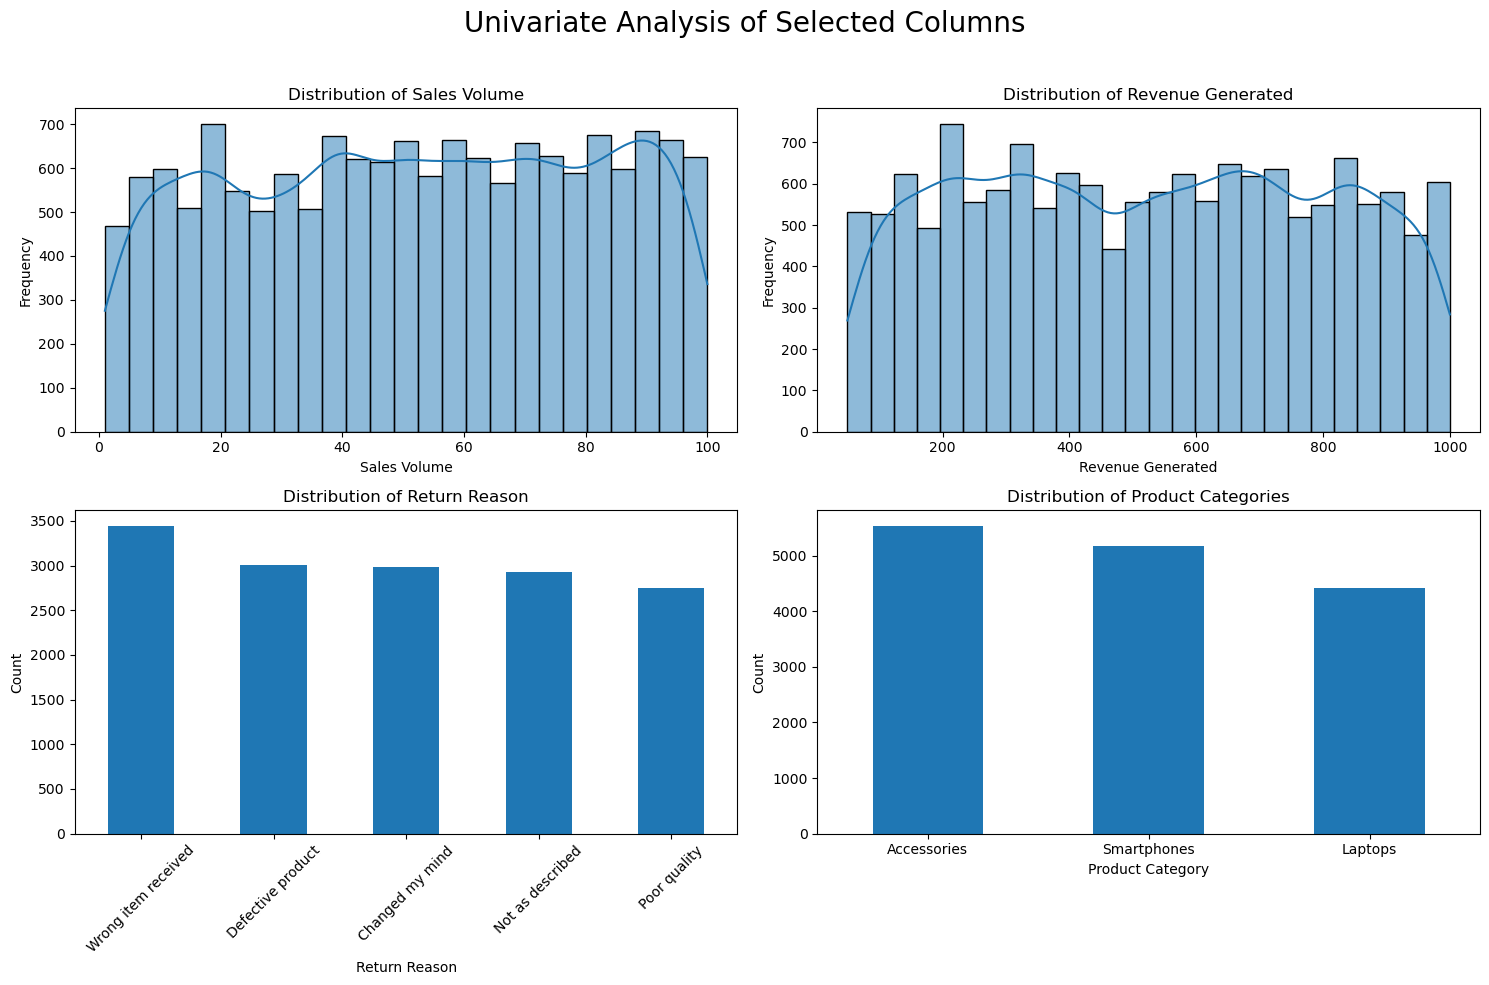

In [140]:
# Univariate Analysis - to observe some trends in the dataset
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize =(15,10))

# Univariate Analysis for Sales_Volume
sns.histplot(full_data['Sales Volume'], kde = True, ax = axes[0,0])
axes[0,0].set_title('Distribution of Sales Volume')
axes[0,0].set_xlabel('Sales Volume')
axes[0,0].set_ylabel('Frequency')

# Univariate Analysis for Revenue_Generated
sns.histplot(full_data['Revenue Generated'], kde = True, ax = axes[0,1])
axes[0,1].set_title('Distribution of Revenue Generated')
axes[0,1].set_xlabel('Revenue Generated')
axes[0,1].set_ylabel('Frequency')

# Univariate Analysis for Return_Reason
return_reason_count = full_data['Return Reason'].value_counts()
return_reason_count.plot(kind = 'bar', ax = axes[1,0])
axes[1,0].set_title('Distribution of Return Reason')
axes[1,0].set_xlabel('Return Reason')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis ='x', rotation =45)

# Univariate Analysis for Product_Category
Product_Category_count = full_data['Product Category'].value_counts()
Product_Category_count.plot(kind = 'bar', ax = axes[1,1])
axes[1,1].set_title('Distribution of Product Categories')
axes[1,1].set_xlabel('Product Category')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis ='x', rotation =360)

fig.suptitle('Univariate Analysis of Selected Columns', fontsize = 20)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

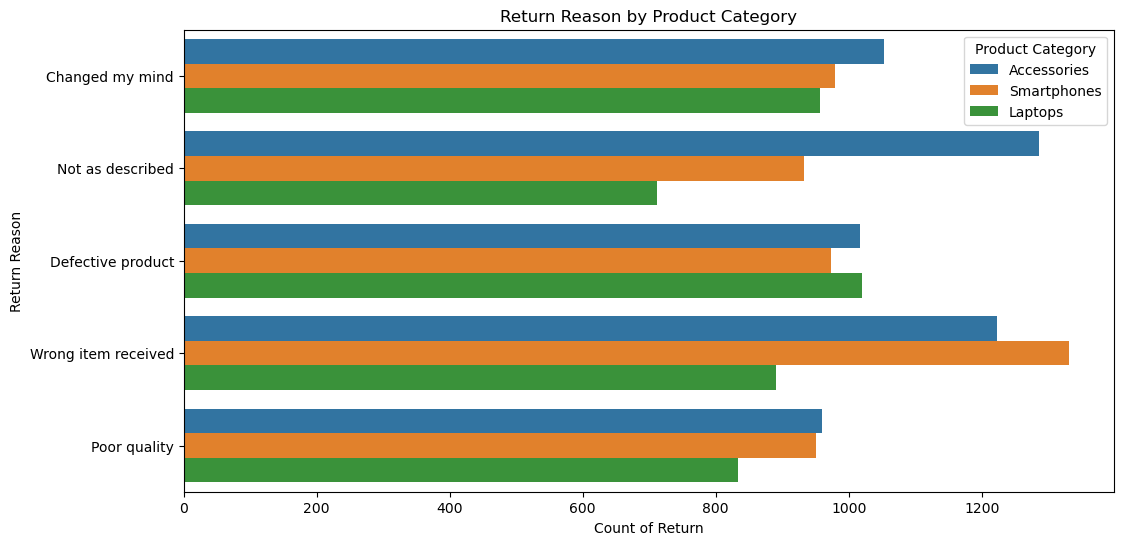

In [149]:
#Bivariant Analysis

plt.figure(figsize= (12,6))
sns.countplot(y= 'Return Reason', hue = 'Product Category', data = full_data)
plt.title('Return Reason by Product Category')
plt.xlabel ('Count of Return')
plt.ylabel ('Return Reason')
plt.show()

DEEP DIVE INTO PRODUCT QUALITY AND RETURN RATE

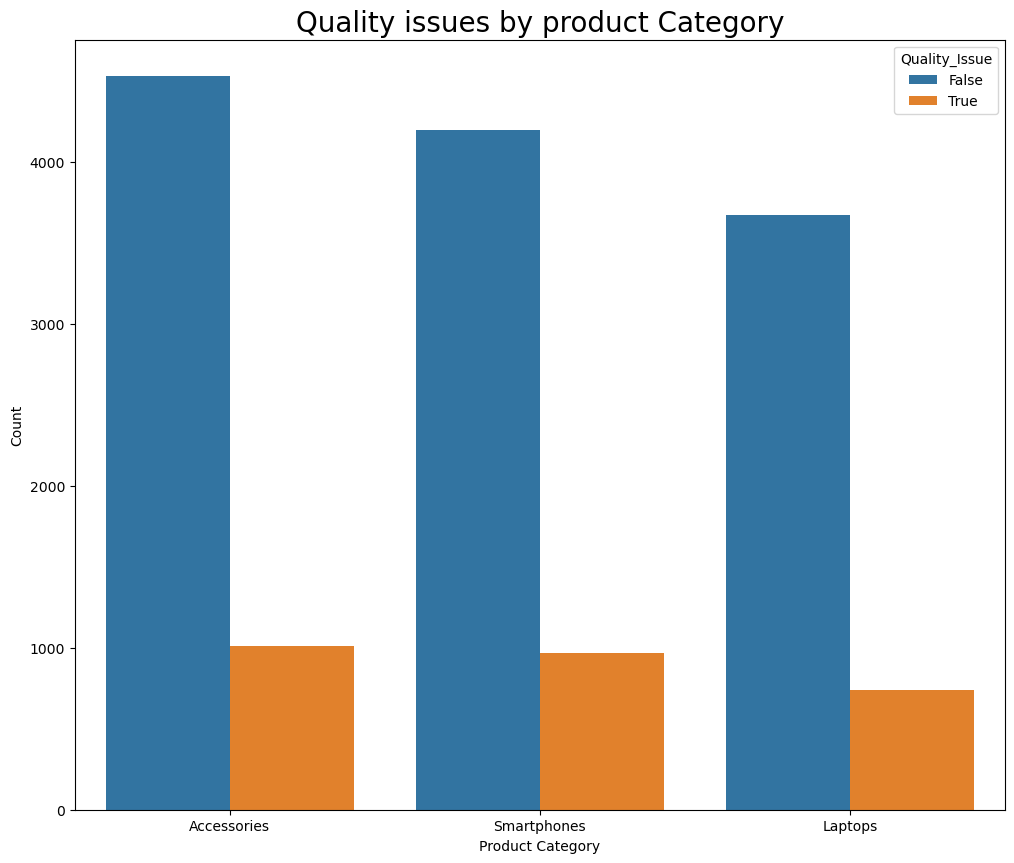

In [178]:
quality_related_terms = ['defective', 'poor quality', 'not as described','disappointing', 'poor']

full_data['Quality_Issue'] = full_data['Customer Feedback'].apply(lambda x: any(term in x.lower() for term in quality_related_terms))

quality_issue_return =  full_data['Quality_Issue'].value_counts()

plt.figure(figsize= (12,10))
sns.countplot(x= 'Product Category', hue = 'Quality_Issue', data = full_data)
plt.title('Quality issues by product Category', fontsize = 20)
plt.xlabel ('Product Category')
plt.ylabel ('Count')
plt.show()                                                                               

In [208]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(full_data['Product Category'],full_data['Quality_Issue'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2_test_result = {
                    "Chi2-Square Statistic" : chi2,
                    "p-value" : p,
                    "Degrees Of Freedom" : dof,
                    "Expected Frequencies": expected
                   }
                    

In [210]:
quality_issue_return

Quality_Issue
False    12404
True      2717
Name: count, dtype: int64

In [212]:
chi2_test_result 

{'Chi2-Square Statistic': 6.5587129862987865,
 'p-value': 0.03765247864083011,
 'Degrees Of Freedom': 2,
 'Expected Frequencies': array([[4543.73097017,  995.26902983],
        [3620.05502282,  792.94497718],
        [4240.21400701,  928.78599299]])}

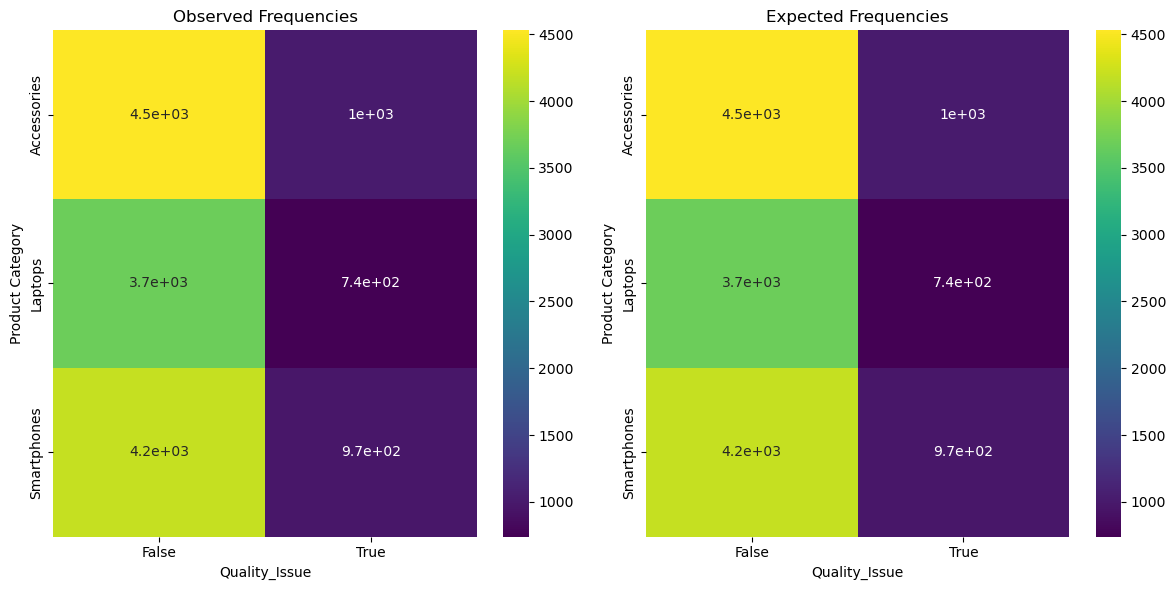

In [228]:
exoected_df = pd.DataFrame(expected, index = contingency_table.index, columns = contingency_table.columns)

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.heatmap(contingency_table, annot= True, cmap = 'viridis', ax= ax[0])
ax[0].set_title('Observed Frequencies')

sns.heatmap(contingency_table, annot= True, cmap = 'viridis', ax= ax[1])
ax[1].set_title('Expected Frequencies')

plt.tight_layout()
plt.show()

  # Insights
  

## Quality-Related Returns Vary Across Categories:

﻿﻿A significant proportion of returns are linked to quality issues, especially in certain product categories.
  
﻿﻿The chi-square test indicated a statistically significant relationship between product categories and quality issues.
Specific Categories with Higher Quality Issues:

• Among the product categories, some show a higher prevalence of quality-related feedback. These categories warrant closer inspection and targeted improvements.

## Customer Feedback as a Quality Indicator:

• Customer feedback frequently mentions quality issues like 'defective products' or 'poor quality, highlighting the importance of addressing these concerns.

# Recommendations

## Enhanced Quality Control for Targeted Categories:

• Tech should implement stricter quality control measures, especially for the product categories with a higher incidence of quality-related returns. This could involve more rigorous testing and inspection processes.

Review and Strengthen Supplier Relationships:

• Analyze and review supplier performance. For suppliers consistently linked to quality issues, consider renegotiation of terms, additional quality checks, or seeking alternative suppliers.

# Leverage Customer Feedback for Product Improvements:

• Utilize the insights from customer feedback to inform product development. Identify common complaints and address these in future product designs or updates.
Enhance Customer Education and Support:

• Some returns may be due to misunderstandings about product use. Providing better educational materials and proactive customer support could reduce such returns.

Regular Data Analysis for Continuous Improvement:

• Continue to analyze sales, feedback, and return data regularly to identify emerging trends or new issues, allowing for timely corrective actions.
Invest in Predictive Analytics:

• Implement predictive analytics to identify potential quality issues before products are shipped. This could help in proactively addressing problems and reducing future returns.
                                                                                                          
# Conclusion

**By focusing on these areas, Tech can potentially reduce return rates, leading to increased customer satisfaction and reduced operational costs associated with handling returns. The key is a combination of proactive quality management, continuous data monitoring, and leveraging customer feedback for ongoing improvements.**